In [2]:
from __future__ import print_function, division
from collections import defaultdict, OrderedDict
import gzip
import pickle
import json
import os
import uproot
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from fnal_column_analysis_tools import hist
from fnal_column_analysis_tools.hist import plot


In [3]:
hists={}
for filename in os.listdir('hists'):
    print(filename)
    with gzip.open('hists/'+filename) as fin:
        hin = pickle.load(fin)
        for k in hin.keys():
            if k in hists: hists[k]+=hin[k]
            else: hists[k]=hin[k]
        
print(hists['recoil'].values(sumw2=True))
print(hists['recoil'].identifiers("dataset"))

ZJetsToNuNu_HT-100To200_13TeV-madgraph.pkl.gz
ZJetsToNuNu_HT-600To800_13TeV-madgraph.pkl.gz
ZJetsToNuNu_HT-2500ToInf_13TeV-madgraph.pkl.gz
ZJetsToNuNu_HT-1200To2500_13TeV-madgraph.pkl.gz
ZJetsToNuNu_HT-400To600_13TeV-madgraph.pkl.gz
ZJetsToNuNu_HT-800To1200_13TeV-madgraph.pkl.gz
ZJetsToNuNu_HT-200To400_13TeV-madgraph.pkl.gz
{('ZJetsToNuNu_HT-100To200_13TeV-madgraph',): (array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0.]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0.])), ('ZJetsToNuNu_HT-600To800_13TeV-madgraph',): (array([126.64030152,  63.41459335,  63.22697247,  30.80244314,
        50.15217396,   0.2821899 ,  75.75433269,  37.8210318 ,
        25.28406296,  38.08855591,  50.74108101,  62.60923957,
        12.44239983,  12.55441607,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ]), array([3.20220551e-02, 1.60349081e-02, 1.5

In [4]:
process = hist.Cat("process", "Process", sorting='placement')
process_cats = ("dataset",)
process_map = OrderedDict()
#process_map["Hcc"] = ("GluGluHToCC", 2)
#process_map["Hbb"] = ("GluGluHToBB", 3)
process_map["Zjets"] = ("ZJets*",)
#process_map["Zcc"] = ("ZJetsToQQ_HT*", 2)
#process_map["Zbb"] = ("ZJetsToQQ_HT*", 3)
#process_map["Wqq"] = ("WJetsToQQ_HT*", 1)
#process_map["Wcs"] = ("WJetsToQQ_HT*", 2)
#process_map["Top"] = ("TTTo*", slice(None))
#process_map["QCD"] = ("QCD*", slice(None))


for key in hists.keys():
    hists[key] = hists[key].group(process, process_cats, process_map)

print(hists['recoil'].values(sumw2=True))
print(hists['recoil'].identifiers("process"))
print(hists['recoil'])

{('Zjets',): (array([1.37783677e+03, 5.57030428e+02, 3.02110550e+02, 7.49061532e+02,
       6.75845879e+02, 9.16417529e+01, 4.02691173e+02, 2.00455686e+02,
       1.02392608e+02, 9.67525058e+01, 1.11933171e+02, 6.26092396e+01,
       1.29268488e+01, 1.26202932e+01, 0.00000000e+00, 4.72680324e+01,
       1.38150158e-01, 0.00000000e+00, 0.00000000e+00, 1.58703192e+01,
       0.00000000e+00]), array([2.43837134e+00, 4.64715669e-01, 4.77389483e-01, 6.35195929e-01,
       8.25186704e-01, 8.06013560e-02, 2.98643356e-01, 1.35162992e-01,
       3.04729369e-02, 5.24706985e-02, 3.17727758e-02, 1.58312677e-02,
       3.15089515e-03, 3.19555567e-03, 0.00000000e+00, 1.43407283e-02,
       4.41793200e-05, 0.00000000e+00, 0.00000000e+00, 5.07520165e-03,
       0.00000000e+00]))}
['Zjets']
<Hist (process,recoil) instance at 0x120c3c748>


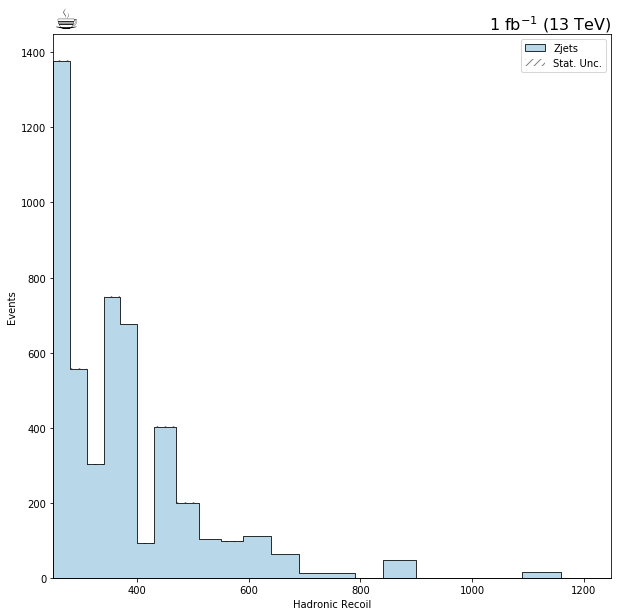

In [5]:
from cycler import cycler

fill_opts = {'edgecolor': (0,0,0,0.3), 'alpha': 0.8}
error_opts = {'label':'Stat. Unc.', 'hatch':'///', 'facecolor':'none', 'edgecolor':(0,0,0,.5), 'linewidth': 0}
nostack_fill_opts = {'alpha': 0.2, 'label': '_nolabel_'}
data_err_opts = {'linestyle':'none', 'marker': '.', 'markersize': 10., 'color':'k', 'elinewidth': 1, 'emarker': '_'}
colors = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c']

fig, ax = plt.subplots(1, 1, figsize=(10,10))
ax.set_prop_cycle(cycler(color=colors))

#print(hists['recoil'],hists['recoil'].values(sumw2=True))
#print(hists['recoil'].identifiers("process")[0] == "Zjets")
#to_plot = hists['recoil'].project("process","Zjets")
#print(to_plot.values(sumw2=True))

plot.plot1d(hists['recoil'], ax=ax, overlay="process", clear=False, stack=True, line_opts=None, fill_opts=fill_opts, error_opts=error_opts)

ax.autoscale(axis='x', tight=True)
ax.set_ylim(0, None)
leg = ax.legend()
coffee = plt.text(0., 1., u"☕", fontsize=28, horizontalalignment='left', verticalalignment='bottom', transform=ax.transAxes)
lumi = plt.text(1., 1., r"1 fb$^{-1}$ (13 TeV)", fontsize=16, horizontalalignment='right', verticalalignment='bottom', transform=ax.transAxes)

In [ ]:
nbins = sum(sum(arr.size for arr in h._sumw.values()) for h in hists.values())
nfilled = sum(sum(np.sum(arr>0) for arr in h._sumw.values()) for h in hists.values())
print("Now %.1fM bins" % (nbins/1e6, ))
print("Nonzero bins: %.1f%%" % (100*nfilled/nbins, ))